# Coil resonator SBS with 2 meter long coil

In [1]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyphotonicsims.control_systems.control_core import *
from pyphotonicsims.control_systems.calculate_laser_noise import *
from pyphotonicsims.laser_dynamics.brillouin_laser import *

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [3.5,3]
plt.rcParams['figure.dpi'] = 300

#### Laser metrics caculation: cavity Q, threshold $P_{th}$, efficiency $\eta$, minimum ST linewidth $\nu_{ST}$
$$P_{th} = \frac{h\nu\gamma^3}{8\mu\gamma_{ex}} $$
$$\eta_{S1} = (\frac{\gamma_{ex}}{\gamma})^2$$
$$\nu_{ST,min} = \frac{n_0\gamma}{2\pi}$$

In [2]:
# # 400 MQ
# r = [0.9, 0.4]          # loss rates = [intrinsic, coupling] in MHz
# L = 2*np.pi*11.787e-3   # cavity length in meter
# vST_min = 0.3           # minimum S1 ST linewidth in Hz

# # 70 MQ
# r = [1.8, 1.8]
# L = 2*np.pi*11.787e-3
# vST_min = 0.7

# # 30 MQ OR3
# r = [3.5, 3.5]
# L = 2*np.pi*11.787e-3
# vST_min = 0.7

# # 800MQ 4 meter fiber cavity at 1550
# r = [0.30, 0.40]
# L = 2*np.pi*11.787e-3
# vST_min = 0.007

# 300MQ 4 meter coil
r = [1.0, 1.0]
L = 2.
vST_min = 0.02

sbs = SBSLaser(ord = 4, r = r, L = L, vST_min = vST_min)

-----------------REPORT------------------
Cavity Q:      96.71 M
P_th:          23.277 mW
min FLW:       0.020 Hz
S1 efficiency: 0.250
rho:           11.322
GB:            0.170


#### Pump power sweep from 0 mW to $10\times P_{th}$, showing thresholding and linewidth narrowing behaviors

In [3]:
# Px = np.linspace(0,20*sbs.P_th,100)
# sbs.pump_sweep_visulization(Px)

#### Pump laser detuning sweep above threshold

In [4]:
# abs_heating = [resoance heating redshift in MHz/mW, 
# absoption loss fraction in total intrinsic loss]
# abs_heating = [1.0/(sbs.L/0.07), 0.1] 
# dfx = np.linspace(-10, 10, 100)*sum(r)
# sbs.detuning_sweep_visulization(dfx, 10*sbs.P_th, abs_heating)

#### SBS phase/frequency matching plot

Text(0, 0.5, 'G$_B$ (1/m W)')

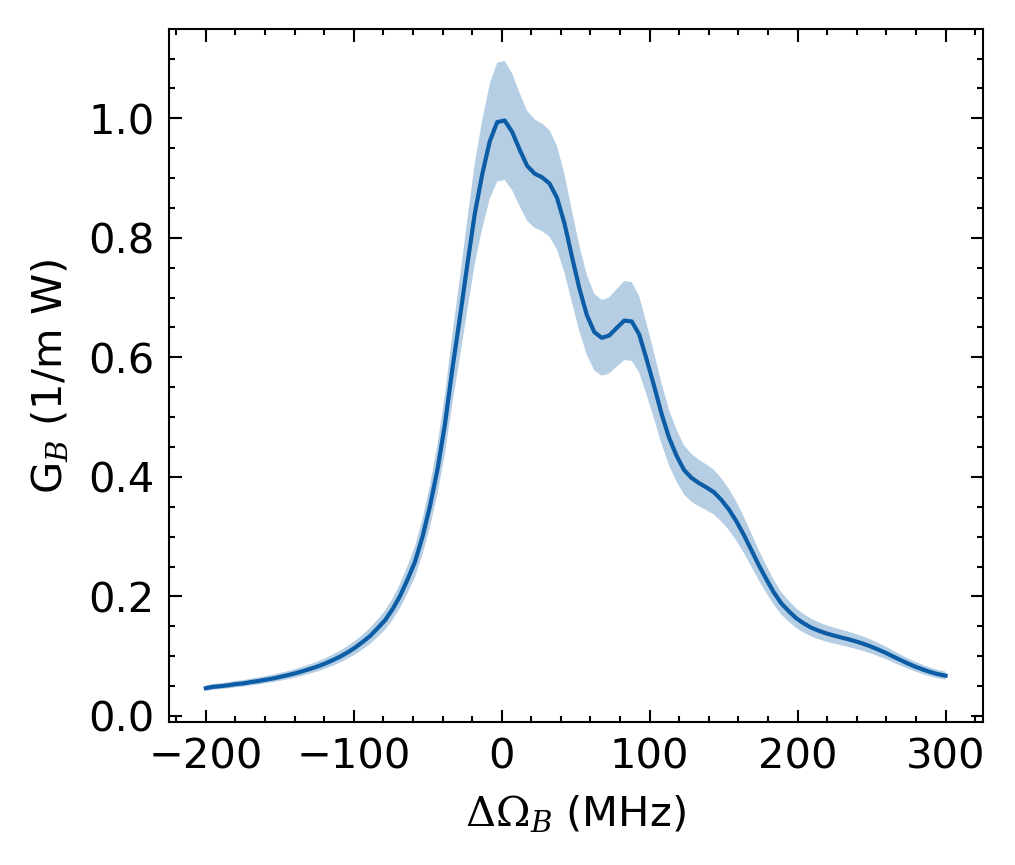

In [5]:
# SBS gain spectrum from COMSOL
df = pd.read_csv('../data/SBS_gain_spectrum_comsol.csv')
df = df.values
dfx = np.linspace(-200.,300,100)
GBx = GB_spectrum_silica(dfx, ifinterp = True, df1 = df[:,0], GB1 = df[:,1])
plt.plot(dfx, GBx)
plt.fill_between(dfx, GBx*0.9, GBx*1.1, alpha = 0.3)
plt.xlabel(r'$\Delta\Omega_B$' + ' (MHz)')
plt.ylabel('G' + r'$_B$' + ' (1/m W)')

ng = 1.5365
V_ac = 6052.8 m/s


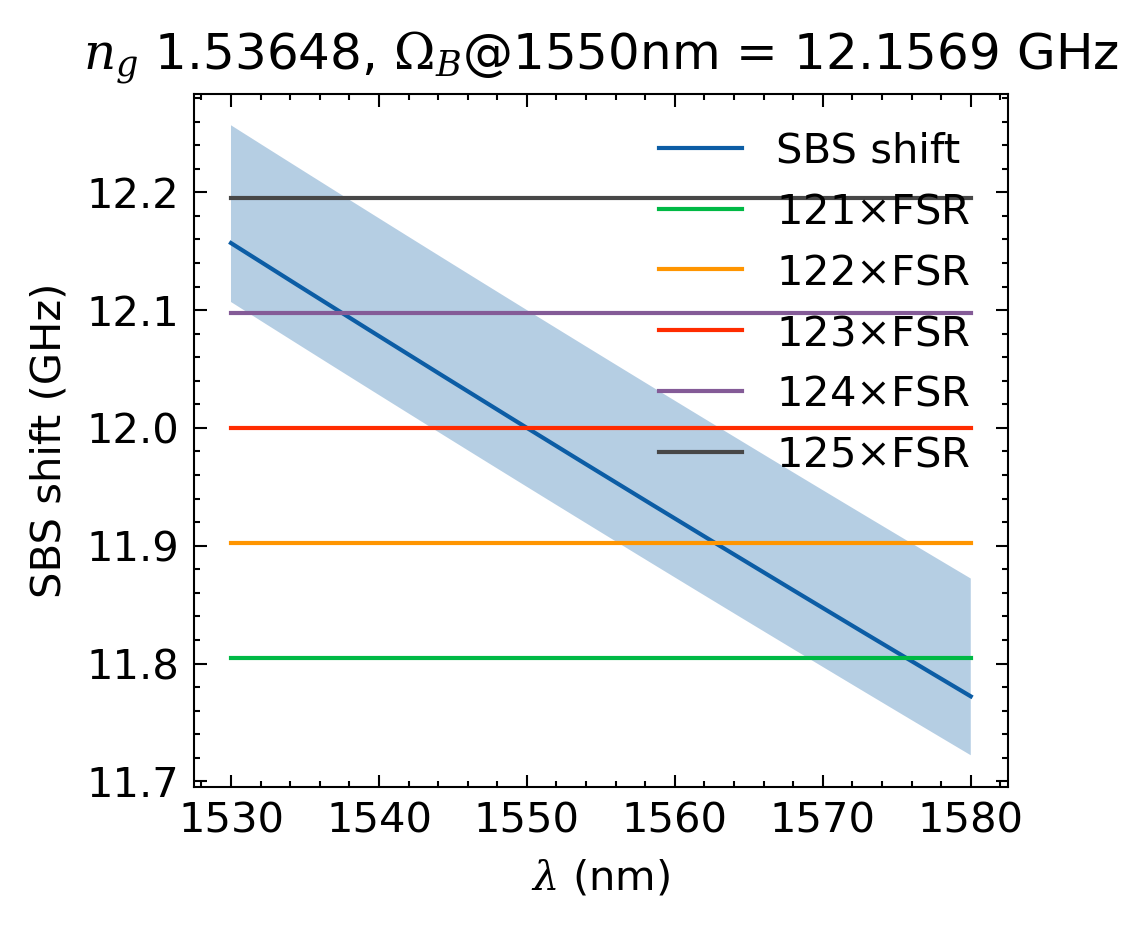

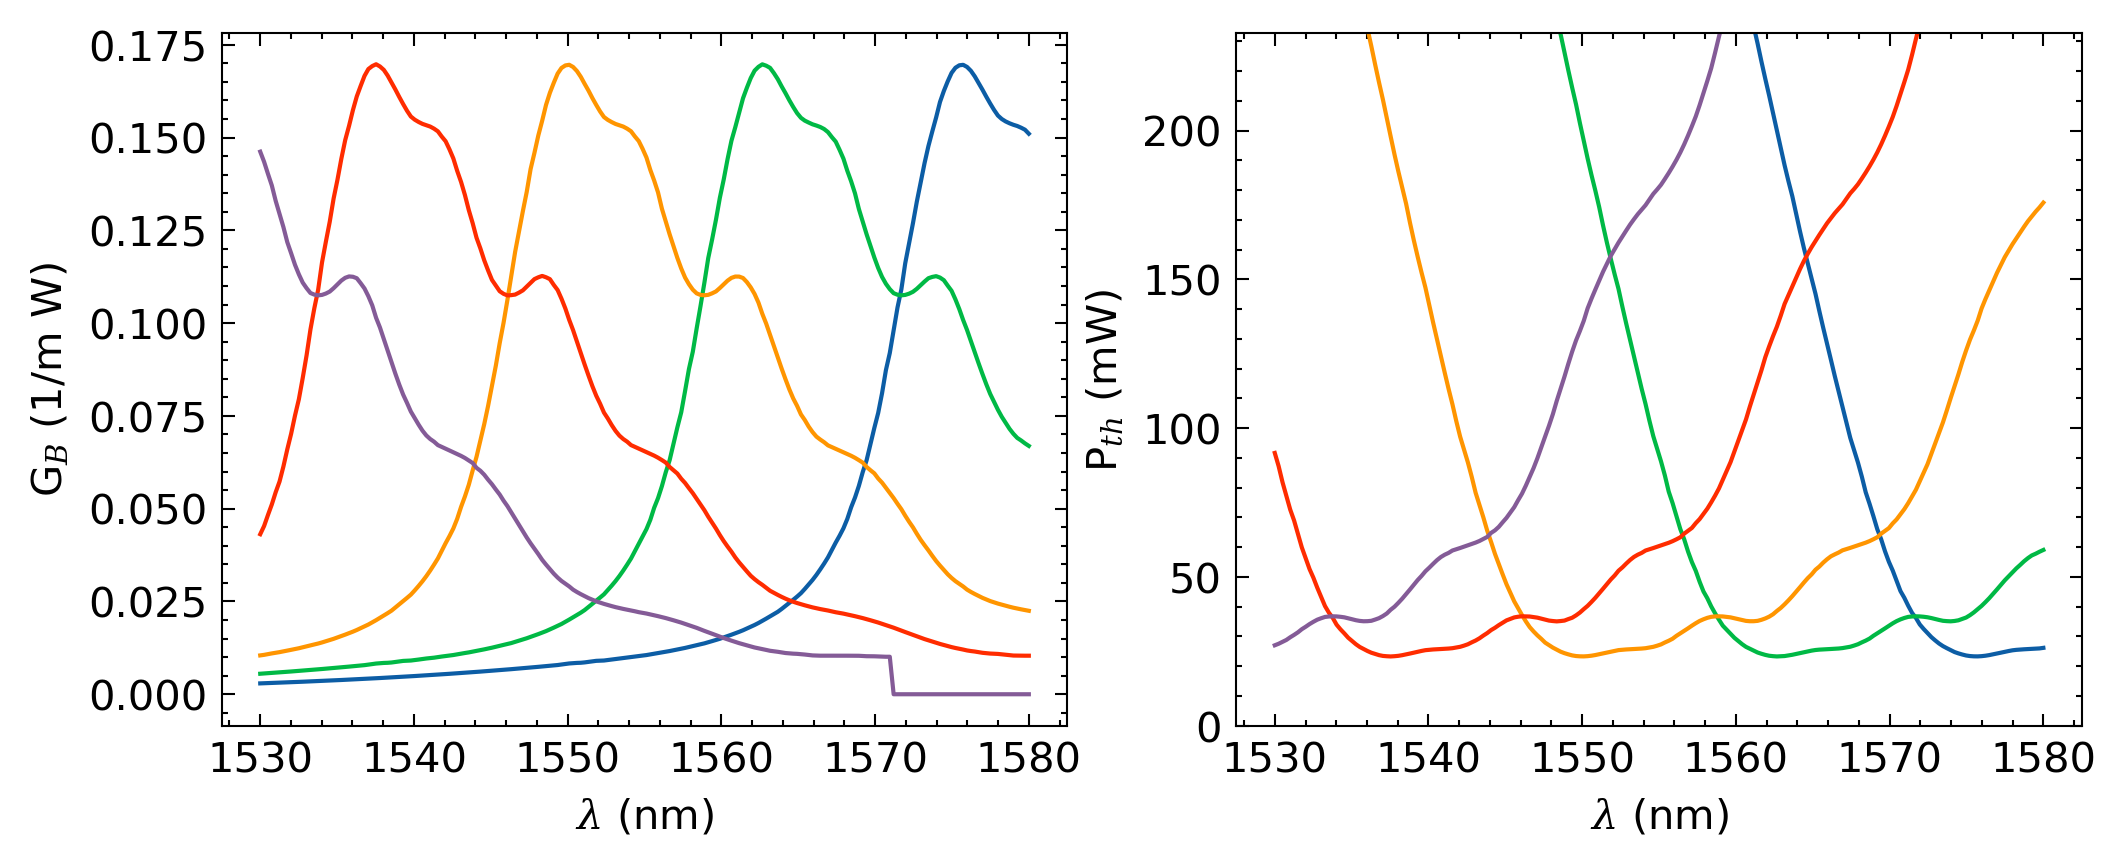

In [6]:
# 60 MQ 80nm thick nitride TE mode
# Measured pump-S1 beatnote frequency 11.45 GHz at 1560 nm
sbs.ng = 1.54
f_pump_S1 = 12.0e9
wl_match = 1550e-9
ng, Vac = sbs.get_ng_from_sbs_freq_matching(f_pump_S1, wl_match)
sbs.sbs_freq_matching_plot(ng, Vac, wl_match, m_plus = 2, ifinterp = True, df1 = df[:,0], GB1 = df[:,1])